In [1]:
# DATA PREPARATING
import pandas as pd
import numpy as np

# VIZUALISATION
import seaborn as sns
import matplotlib.pyplot as plt

# MACHINE LEARNING
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config; set_config(display='diagram')
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.model_selection import train_test_split


# Loading the data

In [2]:
#load the dataframe from a local direcrory
df = pd.read_csv('../raw_data/df_final.csv')

/Users/david/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Discovering the data

## Feature engineering

In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
df = df.dropna()

In [5]:
df.shape

(8322174, 12)

In [6]:
df.isnull().sum()

username      0
session_id    0
action        0
time          0
truth         0
id            0
start         0
end           0
category      0
gender        0
education     0
birth         0
dtype: int64

In [7]:
df.head()

,username,session_id,action,time,truth,id,start,end,category,gender,education,birth
0,5981,d8a9b787fa69063c34c73b9c29190b1c,click_about,2015-09-27T15:42:59,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,male,Master's,1989.0
1,5981,d8a9b787fa69063c34c73b9c29190b1c,click_info,2015-09-27T15:43:12,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,male,Master's,1989.0
97,561867,9f5afae301f874248f02423d80a89b28,click_about,2015-10-25T10:50:44,0,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,female,Associate,1981.0
98,561867,9f5afae301f874248f02423d80a89b28,click_courseware,2015-10-25T10:51:09,0,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,female,Associate,1981.0
99,561867,9f5afae301f874248f02423d80a89b28,click_about,2015-10-25T10:50:39,0,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,female,Associate,1981.0


In [8]:
#df.to_csv('/content/drive/MyDrive/changeDEEPly/data/df_full.csv')

In [9]:
df.shape

(8322174, 12)

In [10]:
#find unique values
df.nunique()

username        14297
session_id      81687
action             22
time          5453013
truth               2
id                245
start             140
end               175
category           17
gender              2
education           7
birth              79
dtype: int64

In [11]:
#explore different values of birth and education
df.education.unique()

array(["Master's", 'Associate', 'High', "Bachelor's", 'Middle',
       'Doctorate', 'Primary'], dtype=object)

In [12]:
#plot the users based on year of birth
df.birth.unique()

array([1989., 1981., 1992., 1983., 1994., 1993., 1972., 1995., 1991.,
       1988., 1986., 1990., 1996., 1966., 1984., 1975., 1985., 1977.,
       1987., 1982., 1998., 1973., 1976., 1978., 1997., 1980., 1979.,
       1971., 2000., 1968., 1965., 1897., 1974., 2013., 1964., 1969.,
       1950., 2001., 1948., 1999., 1957., 1963., 1960., 2005., 1956.,
       1944., 1958., 1961., 1970., 1967., 1955., 1898., 1962., 2016.,
       2014., 1959., 2002., 2012., 2015., 1952., 1954., 2004., 2007.,
       2017., 1896., 1946., 2010., 2003., 1953., 1935., 1938., 1945.,
       2011., 1939., 2006., 2018., 1899., 2009., 1895.])

In [13]:
df.birth.min()

1895.0

In [14]:
df.birth.max()

2018.0

In [15]:
# Dropping the users who were born after 2010
df = df[df.birth < 2010]

In [16]:
def age_constructor(df):
    df['age'] = pd.DatetimeIndex(pd.to_datetime(df['start'], format='%Y/%m/%d')).year - pd.DatetimeIndex(pd.to_datetime(df['birth'], format='%Y')).year
    return df

In [17]:
age_constructor(df)

,username,session_id,action,time,truth,id,start,end,category,gender,education,birth,age
0,5981,d8a9b787fa69063c34c73b9c29190b1c,click_about,2015-09-27T15:42:59,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,male,Master's,1989.0,26
1,5981,d8a9b787fa69063c34c73b9c29190b1c,click_info,2015-09-27T15:43:12,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,male,Master's,1989.0,26
97,561867,9f5afae301f874248f02423d80a89b28,click_about,2015-10-25T10:50:44,0,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,female,Associate,1981.0,34
98,561867,9f5afae301f874248f02423d80a89b28,click_courseware,2015-10-25T10:51:09,0,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,female,Associate,1981.0,34
99,561867,9f5afae301f874248f02423d80a89b28,click_about,2015-10-25T10:50:39,0,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,female,Associate,1981.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165370,2588048,7eeca1d2f2d0aa649bfa447dac97606c,click_about,2016-03-19T12:33:47,1,4435,2016-03-01 08:00:00,2016-06-29 00:00:00,chemistry,male,Middle,1999.0,17
29165371,2588048,7eeca1d2f2d0aa649bfa447dac97606c,click_about,2016-03-19T12:33:52,1,4435,2016-03-01 08:00:00,2016-06-29 00:00:00,chemistry,male,Middle,1999.0,17
29165372,2588048,7eeca1d2f2d0aa649bfa447dac97606c,click_info,2016-03-19T12:33:53,1,4435,2016-03-01 08:00:00,2016-06-29 00:00:00,chemistry,male,Middle,1999.0,17
29165373,2588048,7eeca1d2f2d0aa649bfa447dac97606c,click_info,2016-03-19T12:33:54,1,4435,2016-03-01 08:00:00,2016-06-29 00:00:00,chemistry,male,Middle,1999.0,17


<AxesSubplot:xlabel='birth', ylabel='Count'>

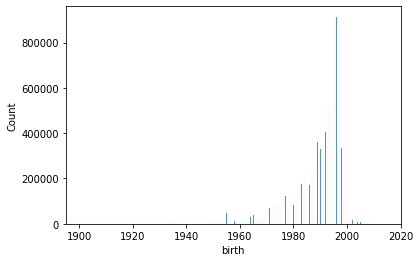

In [18]:
fig, ax = plt.subplots()
ax.set_xlim(1895.,2020.)
sns.histplot(df.birth.dropna(),ax=ax)

<AxesSubplot:xlabel='education', ylabel='Count'>

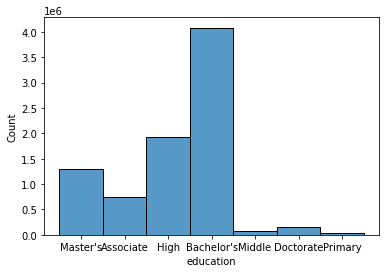

In [19]:
#plot education
sns.histplot(df.education.dropna())

<AxesSubplot:xlabel='category', ylabel='Count'>

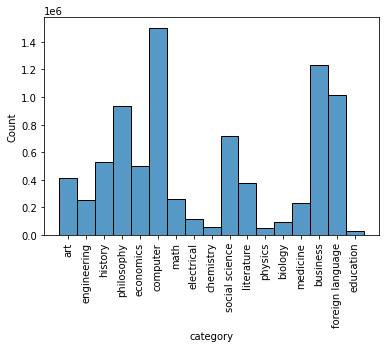

In [20]:
#plot category available
plt.xticks(rotation = 90)
sns.histplot(df.category)

In [21]:
# find the completed courses as per the category
t = df[df['truth'] == 0]

In [22]:
# find the dropout courses as per the category
t_1 = df[df['truth'] == 1]

<AxesSubplot:xlabel='category', ylabel='Count'>

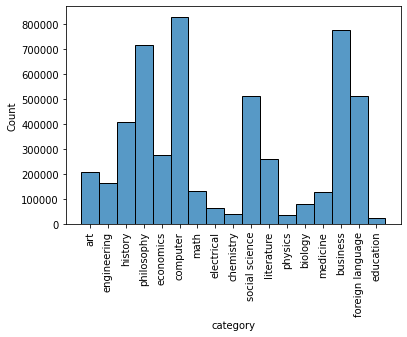

In [23]:
#plot category available for all completed courses
plt.xticks(rotation = 90)
sns.histplot(t.category)

<AxesSubplot:xlabel='category', ylabel='Count'>

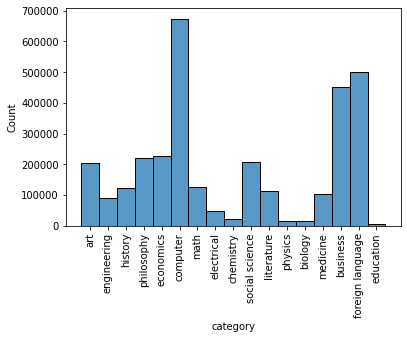

In [24]:
#plot category available for all dropped out courses
plt.xticks(rotation = 90)
sns.histplot(t_1.category)

<AxesSubplot:xlabel='gender', ylabel='Count'>

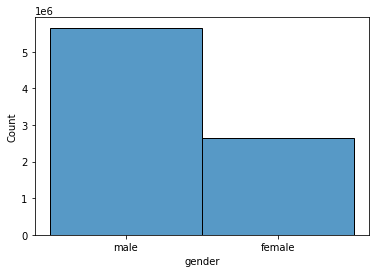

In [25]:
#plot gender who enrolled into course
sns.histplot(df.gender)

In [26]:
# percentage of completion wrt number of users enrolled for all courses
p_Completion_courses = len(t)/len(df)
p_Completion_courses


0.6201683542535898

In [27]:
# percentage of drouputs wrt number of users enrolled for all courses
p_dropout_courses = len(t_1)/len(df)
p_dropout_courses


0.37983164574641015

<AxesSubplot:xlabel='category', ylabel='Count'>

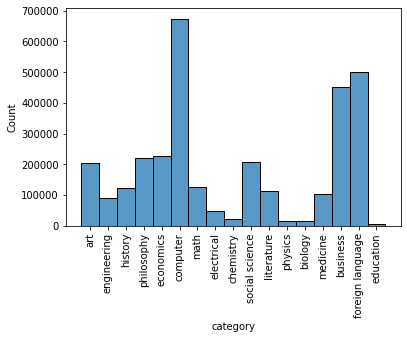

In [28]:
#plot category where there were dropouts
plt.xticks(rotation = 90)
sns.histplot(t_1.category)

In [29]:
df.dtypes

username        int64
session_id     object
action         object
time           object
truth           int64
id              int64
start          object
end            object
category       object
gender         object
education      object
birth         float64
age             int64
dtype: object

In [30]:
df['Datetime'] = pd.to_datetime(df['time'])

In [31]:
df = df.drop(['time'], axis = 1)

In [32]:
## try to convert datetime to timestamp 
df['timestamp'] = df.Datetime.values.astype(np.int64) // 10 ** 9

In [33]:
df = df.drop(['Datetime'], axis = 1)

In [34]:
df = df.sort_values(['username','timestamp'])

In [35]:
df['timediff'] = pd.DataFrame(df.groupby('username').timestamp.diff().fillna(0))
df.head()

,username,session_id,action,truth,id,start,end,category,gender,education,birth,age,timestamp,timediff
865516,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613884,0.0
865517,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613889,5.0
865520,5,6ff66b03510e0dc515ea4637216f1ad3,close_courseware,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613995,106.0
865529,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613999,4.0
865535,5,6ff66b03510e0dc515ea4637216f1ad3,play_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443614005,6.0


In [36]:
df.nunique()

username        14243
session_id      81240
action             22
truth               2
id                245
start             140
end               175
category           17
gender              2
education           7
birth              70
age                75
timestamp     5437750
timediff       114990
dtype: int64

In [37]:
# to see how much time each user spent including all action they did 
time_df = pd.DataFrame(df.groupby('username').sum()['timediff']).sort_values(by=['timediff'],ascending=False)

In [38]:
time_df

,timediff
username,
321214,62908012.0
328771,62508383.0
12466,61495321.0
45200,61460239.0
97105,61230810.0
...,...
143673,0.0
85958,0.0
224043,0.0


## Final Dataframe

In [39]:
df.head()

,username,session_id,action,truth,id,start,end,category,gender,education,birth,age,timestamp,timediff
865516,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613884,0.0
865517,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613889,5.0
865520,5,6ff66b03510e0dc515ea4637216f1ad3,close_courseware,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613995,106.0
865529,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613999,4.0
865535,5,6ff66b03510e0dc515ea4637216f1ad3,play_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443614005,6.0


In [40]:
df.shape

(8291326, 14)

In [41]:
df.education.unique()

array(['Doctorate', "Bachelor's", "Master's", 'High', 'Associate',
       'Middle', 'Primary'], dtype=object)

# Pipeline for preprocessing + baseline model

## Selecting/reducing the data for the baseline model

In [42]:
df.gender.value_counts()

male      5654921
female    2636405
Name: gender, dtype: int64

In [43]:
df.head()

,username,session_id,action,truth,id,start,end,category,gender,education,birth,age,timestamp,timediff
865516,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613884,0.0
865517,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613889,5.0
865520,5,6ff66b03510e0dc515ea4637216f1ad3,close_courseware,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613995,106.0
865529,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613999,4.0
865535,5,6ff66b03510e0dc515ea4637216f1ad3,play_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443614005,6.0


In [44]:
#def age_constructor(data):
#    return pd.DatetimeIndex(pd.to_datetime(data['start'], format='%Y/%m/%d')).year - pd.DatetimeIndex(pd.to_datetime(data['birth'], format='%Y')).year

In [45]:
df.birth.max()

2009.0

In [46]:
#df.loc[df['birth'] == 2018]

In [47]:
# Selecting the relevant features for the X
X = df[['age', 'category', 'gender', 'education']]

In [48]:
X.head()

,age,category,gender,education
865516,30,computer,male,Doctorate
865517,30,computer,male,Doctorate
865520,30,computer,male,Doctorate
865529,30,computer,male,Doctorate
865535,30,computer,male,Doctorate


In [49]:
# Defining the target
y = df['truth']

In [50]:
# Reducing X only for the first 2_000 rows
X = X.iloc[:5_000]

In [51]:
# Reducing y only for the first 2_000 rows
y = y.iloc[:5_000]

In [52]:
# Plitting the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Preprocessing pipeline

In [53]:
# Scale for numerical variables: 
num_transformer = Pipeline([
    ('scaler', StandardScaler())])

# Encode categorical variables with OneHotEncoder
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Paralellize "num_transformer" and "One hot encoder"
preprocessor = ColumnTransformer([
    ('num_tr', num_transformer, ['age']),
    ('cat_tr', cat_transformer, ['education', 'gender', 'category'])],
    remainder='drop')
    
preprocessor

ColumnTransformer(transformers=[('num_tr',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age']),
                                ('cat_tr',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['education', 'gender', 'category'])])

In [54]:
# Controlling the output after the preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)

display(X_train.head(3))
display(pd.DataFrame(X_train_transformed).head(3))

,age,category,gender,education
10896075,26,art,female,Master's
10896678,26,art,female,Master's
4346263,21,business,female,Bachelor's


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.696779,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.696779,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.023541,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# The shape of the preprocessed X
X_train_transformed.shape

(3500, 22)

## Merging the preprocessing pipeline with the baseline model KNN

In [56]:
pipe = make_pipeline(preprocessor, KNeighborsClassifier())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_tr',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat_tr',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['education', 'gender',
                                                   'category'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [57]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.9854285714285714

In [58]:
# Training the model
knn_model = pipe.fit(X_train, y_train)

In [59]:
# Model score on unseen data
knn_model.score(X_test, y_test)

0.9866666666666667

In [60]:
# Using the model for prediction
knn_model.predict_proba(pd.DataFrame(X_train.iloc[0,:]).T)

array([[1., 0.]])

## Exporting the model

In [61]:
# Exporting the baseline model (the notebook has been updated, and the model as well. The new model is not exported 04.03.2022, 16:42)
#filename = "KNN_BaseModel.joblib"
#joblib.dump(knn_model, filename)

## Updated preprocessing pipeline - new feature (action) added 


In [62]:
# Scale for numerical variables: 
num_transformer2 = Pipeline([
    ('scaler', StandardScaler())])

# Encode categorical variables with OneHotEncoder
cat_transformer2 = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Paralellize "num_transformer" and "One hot encoder"
preprocessor2 = ColumnTransformer([
    ('num_tr', num_transformer, ['age']),
    ('cat_tr', cat_transformer, ['education', 'gender', 'category', 'action'])],
    remainder='drop')
    
preprocessor2

ColumnTransformer(transformers=[('num_tr',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age']),
                                ('cat_tr',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['education', 'gender', 'category',
                                  'action'])])

## Merging the updated pipeline with KNN model

In [63]:
pipe2 = make_pipeline(preprocessor, KNeighborsClassifier())
pipe2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_tr',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat_tr',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['education', 'gender',
                                                   'category'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

# Activities per defined time "series"

## Function to return a dataframe (df) of activities happening within a percentage of a course (limit)

In [64]:
df.head(3)

,username,session_id,action,truth,id,start,end,category,gender,education,birth,age,timestamp,timediff
865516,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613884,0.0
865517,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613889,5.0
865520,5,6ff66b03510e0dc515ea4637216f1ad3,close_courseware,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,30,1443613995,106.0


In [65]:
df['user_course_id'] = df['username'].astype(str) + '_' + df['id'].astype(str)

In [66]:
df.shape

(8291326, 15)

In [67]:
def calc_percentage_course(df, limit):
    df['course_start'] = pd.to_datetime(df['start'])
    df['course_start'] = df.course_start.values.astype(np.int64) // 10 ** 9
    df['course_end'] = pd.to_datetime(df['end'])
    df['course_end'] = df.course_end.values.astype(np.int64) // 10 ** 9
    df = df.drop(['start'], axis = 1)
    df = df.drop(['end'], axis = 1)
    df['percent_course'] = (df['timestamp'] - df['course_start'])/(df['course_end'] - df['course_start'])
    users_min_limit_per_comp = df[df['percent_course'] >= 0.3]['username'].unique()
    df = df[df['username'].isin(users_min_limit_per_comp)][df['percent_course'] < limit]
    return df

## Users who completed at least 30% of a course


In [68]:
df_30_perc = calc_percentage_course(df, 0.3)
df_30_perc.head(3)

/var/folders/72/fkz0cc590d36rk6ymj140_qr0000gn/T/ipykernel_88269/3312630568.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['username'].isin(users_min_limit_per_comp)][df['percent_course'] < limit]


,username,session_id,action,truth,id,category,gender,education,birth,age,timestamp,timediff,user_course_id,course_start,course_end,percent_course
865516,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,computer,male,Doctorate,1985.0,30,1443613884,0.0,5_802,1443513600,1452900600,0.010683
865517,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,computer,male,Doctorate,1985.0,30,1443613889,5.0,5_802,1443513600,1452900600,0.010684
865520,5,6ff66b03510e0dc515ea4637216f1ad3,close_courseware,1,802,computer,male,Doctorate,1985.0,30,1443613995,106.0,5_802,1443513600,1452900600,0.010695


In [69]:
df_30_perc.username.nunique()

4984

### Their activities up till 30 % of a course


In [70]:
tomerge_30_1 = df_30_perc[['action', 'user_course_id']].groupby(by=['user_course_id']).count()
tomerge_30_2 = df_30_perc[['user_course_id', 'truth']].drop_duplicates()

In [71]:
# Number of activities and if dopped out
pd.merge(tomerge_30_1, tomerge_30_2, on='user_course_id')

,user_course_id,action,truth
0,1000607_1926,22,0
1,1000607_2070,4,0
2,1000607_2909,6,0
3,1000607_536,342,0
4,1000607_747,200,0
...,...,...,...
19821,99517_6711,159,1
19822,99517_747,84,0
19823,99517_9474,113,0
19824,99517_9598,130,1


### Their activities up till 20 % of a course

In [72]:
df_20_perc = calc_percentage_course(df, 0.2)
df_20_perc.head(3)

/var/folders/72/fkz0cc590d36rk6ymj140_qr0000gn/T/ipykernel_88269/3312630568.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['username'].isin(users_min_limit_per_comp)][df['percent_course'] < limit]


,username,session_id,action,truth,id,category,gender,education,birth,age,timestamp,timediff,user_course_id,course_start,course_end,percent_course
865516,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,computer,male,Doctorate,1985.0,30,1443613884,0.0,5_802,1443513600,1452900600,0.010683
865517,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,computer,male,Doctorate,1985.0,30,1443613889,5.0,5_802,1443513600,1452900600,0.010684
865520,5,6ff66b03510e0dc515ea4637216f1ad3,close_courseware,1,802,computer,male,Doctorate,1985.0,30,1443613995,106.0,5_802,1443513600,1452900600,0.010695


In [73]:
df_20_perc.username.nunique()

4650

In [74]:
tomerge_20_1 = df_20_perc[['action', 'user_course_id']].groupby(by=['user_course_id']).count()
tomerge_20_2 = df_20_perc[['user_course_id', 'truth']].drop_duplicates()

In [75]:
pd.merge(tomerge_20_1, tomerge_20_2, on='user_course_id')

,user_course_id,action,truth
0,1000607_1926,9,0
1,1000607_2070,4,0
2,1000607_2909,3,0
3,1000607_536,341,0
4,1000607_747,96,0
...,...,...,...
16957,99517_6711,159,1
16958,99517_747,84,0
16959,99517_9474,113,0
16960,99517_9598,127,1


### Their activities up till 10 % of a course

In [76]:
df_10_perc = calc_percentage_course(df, 0.1)
df_10_perc

/var/folders/72/fkz0cc590d36rk6ymj140_qr0000gn/T/ipykernel_88269/3312630568.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['username'].isin(users_min_limit_per_comp)][df['percent_course'] < limit]


,username,session_id,action,truth,id,category,gender,education,birth,age,timestamp,timediff,user_course_id,course_start,course_end,percent_course
865516,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,computer,male,Doctorate,1985.0,30,1443613884,0.0,5_802,1443513600,1452900600,0.010683
865517,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,computer,male,Doctorate,1985.0,30,1443613889,5.0,5_802,1443513600,1452900600,0.010684
865520,5,6ff66b03510e0dc515ea4637216f1ad3,close_courseware,1,802,computer,male,Doctorate,1985.0,30,1443613995,106.0,5_802,1443513600,1452900600,0.010695
865529,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,computer,male,Doctorate,1985.0,30,1443613999,4.0,5_802,1443513600,1452900600,0.010696
865535,5,6ff66b03510e0dc515ea4637216f1ad3,play_video,1,802,computer,male,Doctorate,1985.0,30,1443614005,6.0,5_802,1443513600,1452900600,0.010696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17750114,6934979,c351ad70c3edd6c58163099f09bc6c17,close_courseware,1,9801,foreign language,female,Primary,2006.0,11,1494089898,1.0,6934979_9801,1493539200,1499644800,0.090196
17750115,6934979,c351ad70c3edd6c58163099f09bc6c17,click_courseware,1,9801,foreign language,female,Primary,2006.0,11,1494089899,1.0,6934979_9801,1493539200,1499644800,0.090196
17750098,6934979,c351ad70c3edd6c58163099f09bc6c17,click_courseware,1,9801,foreign language,female,Primary,2006.0,11,1494089903,4.0,6934979_9801,1493539200,1499644800,0.090196
17750116,6934979,c351ad70c3edd6c58163099f09bc6c17,close_courseware,1,9801,foreign language,female,Primary,2006.0,11,1494089903,0.0,6934979_9801,1493539200,1499644800,0.090196


In [77]:
df_10_perc.username.nunique()

4027

In [78]:
tomerge_10_1 = df_20_perc[['action', 'user_course_id']].groupby(by=['user_course_id']).count()
tomerge_10_2 = df_20_perc[['user_course_id', 'truth']].drop_duplicates()

In [79]:
pd.merge(tomerge_10_1, tomerge_10_2, on='user_course_id')

,user_course_id,action,truth
0,1000607_1926,9,0
1,1000607_2070,4,0
2,1000607_2909,3,0
3,1000607_536,341,0
4,1000607_747,96,0
...,...,...,...
16957,99517_6711,159,1
16958,99517_747,84,0
16959,99517_9474,113,0
16960,99517_9598,127,1
